# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Get today's date - for use when titling charts.
today_date = datetime.today()
formatted_date = today_date.strftime("%m/%d/%Y")


# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping..." + city_url)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | luderitz
http://api.openweathermap.org/data/2.5/weather?appid=8254348dd1364855c87bc69e06e25cd6&q=luderitz&units=metric
Processing Record 2 of Set 1 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=8254348dd1364855c87bc69e06e25cd6&q=thompson&units=metric
Processing Record 3 of Set 1 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=8254348dd1364855c87bc69e06e25cd6&q=puerto ayora&units=metric
Processing Record 4 of Set 1 | east london
http://api.openweathermap.org/data/2.5/weather?appid=8254348dd1364855c87bc69e06e25cd6&q=east london&units=metric
Processing Record 5 of Set 1 | xai-xai
http://api.openweathermap.org/data/2.5/weather?appid=8254348dd1364855c87bc69e06e25cd6&q=xai-xai&units=metric
Processing Record 6 of Set 1 | madalena
http://api.openweathermap.org/data/2.5/weather?appid=8254348dd1364855c87bc69e06e25cd6&q=madalena&units=metric
Processing Record 7 of Set 1

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luderitz,-26.6481,15.1594,18.97,84,3,3.04,NA,1706302174
1,thompson,55.7435,-97.8558,-4.91,93,100,4.63,CA,1706302174
2,puerto ayora,-0.7393,-90.3518,29.98,90,61,3.58,EC,1706302174
3,east london,-33.0153,27.9116,24.32,69,9,1.33,ZA,1706302174
4,xai-xai,-25.0519,33.6442,22.54,84,0,3.56,MZ,1706302175


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,luderitz,-26.6481,15.1594,18.97,84,3,3.04,NaN,1706302174
1,thompson,55.7435,-97.8558,-4.91,93,100,4.63,CA,1706302174
2,puerto ayora,-0.7393,-90.3518,29.98,90,61,3.58,EC,1706302174
3,east london,-33.0153,27.9116,24.32,69,9,1.33,ZA,1706302174
4,xai-xai,-25.0519,33.6442,22.54,84,0,3.56,MZ,1706302175


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

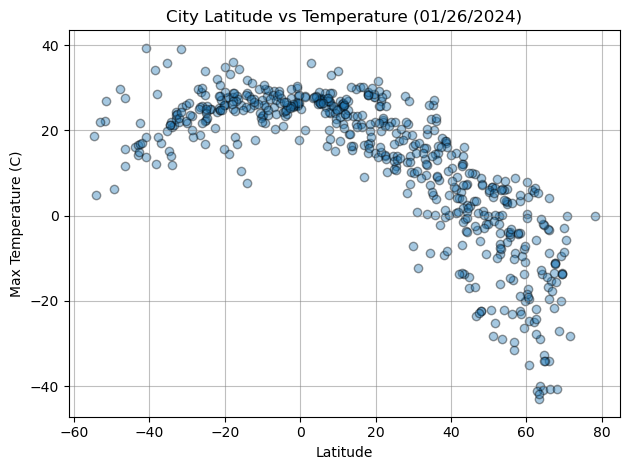

In [34]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]

plt.scatter(x_axis, y_axis, edgecolors="black", alpha=.40)

# Incorporate the other graph properties
plt.grid(color="grey", alpha=.5)
plt.title(f"City Latitude vs Temperature ({formatted_date})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Cities-Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

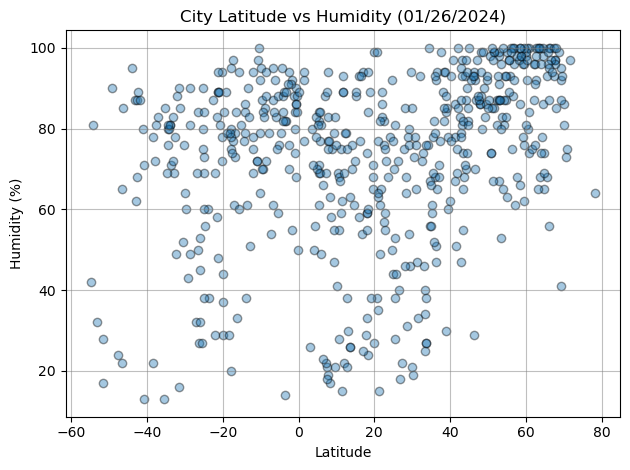

In [35]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]

plt.scatter(x_axis, y_axis, edgecolors="black", alpha=.40)

# Incorporate the other graph properties
plt.grid(color="grey", alpha=.5)
plt.title(f"City Latitude vs Humidity ({formatted_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Cities-Humid.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

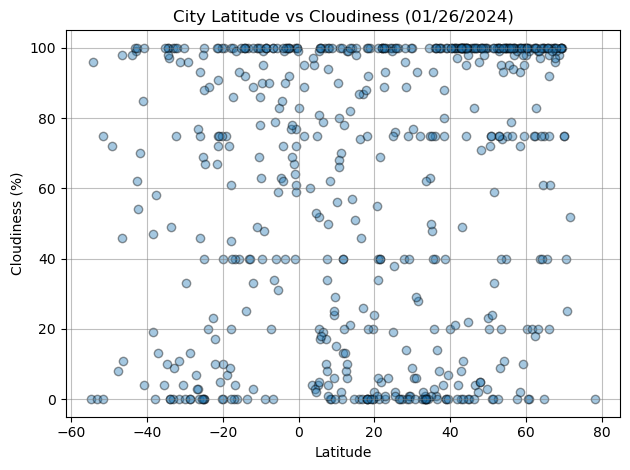

In [36]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]

plt.scatter(x_axis, y_axis, edgecolors="black", alpha=.40)

# Incorporate the other graph properties
plt.grid(color="grey", alpha=.5)
plt.title(f"City Latitude vs Cloudiness ({formatted_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Cities-Cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

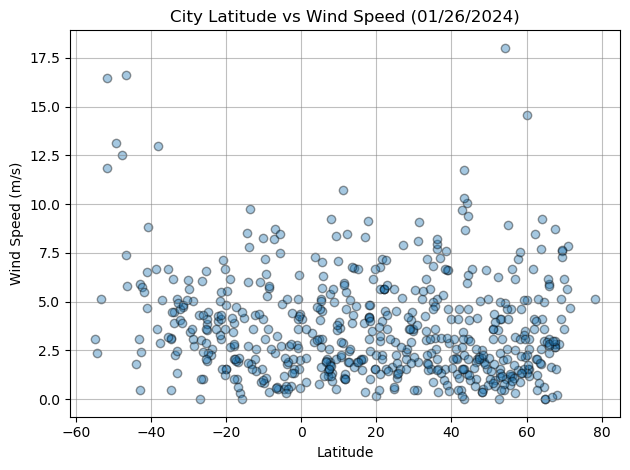

In [37]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]

plt.scatter(x_axis, y_axis, edgecolors="black", alpha=.40)

# Incorporate the other graph properties
plt.grid(color="grey", alpha=.5)
plt.title(f"City Latitude vs Wind Speed ({formatted_date})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Cities-Wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:
# Define a function to create Linear Regression plots
def lin_regress_calc(xvalues, yvalues):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    
    annotation = f"y={slope.round(2)}x + {intercept.round(2)}"
    rvalue_annotation = f"r = {round(rvalue, 2)}"
    plt.plot(xvalues, regress_values, color="red")
    plt.annotate(annotation, xy=(0.05, 0.1), xycoords='axes fraction', color="red", fontsize=14)
    plt.annotate(rvalue_annotation, xy=(0.05, 0.05), xycoords='axes fraction', color="red", fontsize=14)

    return rvalue





In [64]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,thompson,55.7435,-97.8558,-4.91,93,100,4.63,CA,1706302174
5,madalena,41.2162,-8.3345,14.61,78,100,2.10,PT,1706302175
8,iqaluit,63.7506,-68.5145,-29.06,68,40,7.72,CA,1706302151
11,dudinka,69.4058,86.1778,-13.54,92,100,7.60,RU,1706302176
12,longyearbyen,78.2186,15.6401,-0.09,64,0,5.14,SJ,1706302176


In [65]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,luderitz,-26.6481,15.1594,18.97,84,3,3.04,NaN,1706302174
2,puerto ayora,-0.7393,-90.3518,29.98,90,61,3.58,EC,1706302174
3,east london,-33.0153,27.9116,24.32,69,9,1.33,ZA,1706302174
4,xai-xai,-25.0519,33.6442,22.54,84,0,3.56,MZ,1706302175
6,west island,-12.1568,96.8225,25.99,94,3,2.06,CC,1706302154


###  Temperature vs. Latitude Linear Regression Plot

R-Value:  -0.8354150662040148


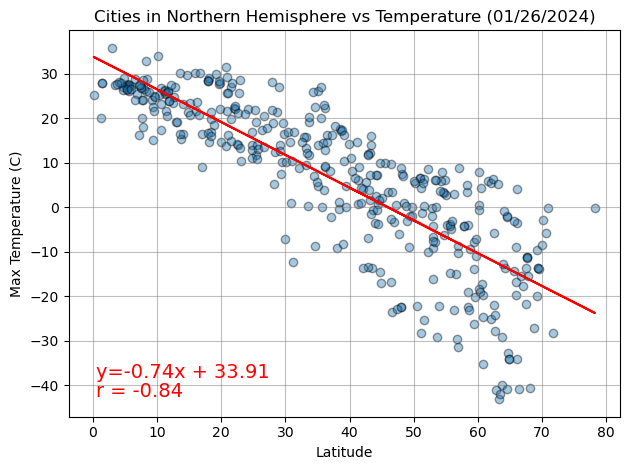

In [66]:
# Linear regression on Northern Hemisphere

x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]

plt.scatter(x_axis, y_axis, edgecolors="black", alpha=.40)
rvalue = lin_regress_calc(x_axis, y_axis)

# Incorporate the other graph properties
plt.grid(color="grey", alpha=.5)
plt.title(f"Cities in Northern Hemisphere vs Temperature ({formatted_date})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/North-Temp.png")

# Show plot
print(f"R-Value:  {rvalue}")
plt.show()


R-Value:  0.38354669372292594


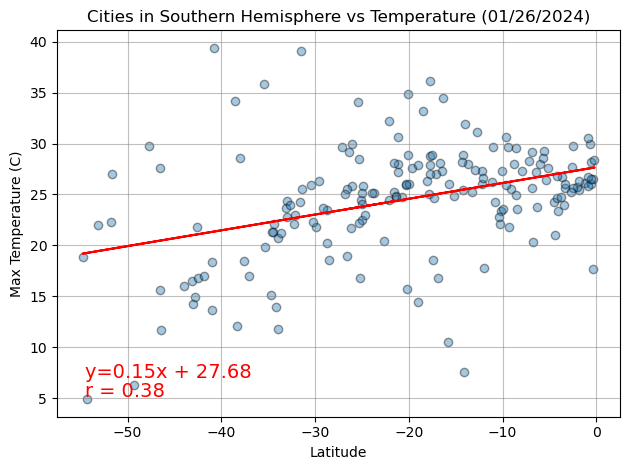

In [67]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]

plt.scatter(x_axis, y_axis, edgecolors="black", alpha=.40,)
rvalue = lin_regress_calc(x_axis, y_axis)

# Incorporate the other graph properties
plt.grid(color="grey", alpha=.5)
plt.title(f"Cities in Southern Hemisphere vs Temperature ({formatted_date})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/South-Temp.png")

# Show plot
print(f"R-Value:  {rvalue}")
plt.show()

**Discussion about the linear relationship:** 

In the northern hemisphere, we can see a strong negative correlation (r = -0.84) between latitude and temperature.  Cities closer to 0 degrees latitude (the equator) experience warmer, while those situated at higher latitude show a more pronounced cooling trend.

The southern hemisphere shows a positive correlation (r = 0.38) between latitude and temperature.  As with the northern hemisphere, cities closer to the equator experience warmer weather and cities that move away from the equator experience cooler weather.  It is worth noting that the correlation is comparatively weaker than the northern hemisphere.  

The difference in correlation strengths could be explained by the earth’s tilt during this time of year (1/26/2024).  The southern hemisphere is transitioning from summer to fall and is likely experiencing more temperate climate.  Whereas the northern hemisphere is tilted away from the sun where the difference in temperatures are more significant between cities as we move further north.


### Humidity vs. Latitude Linear Regression Plot

R-Value:  0.47284699971573096


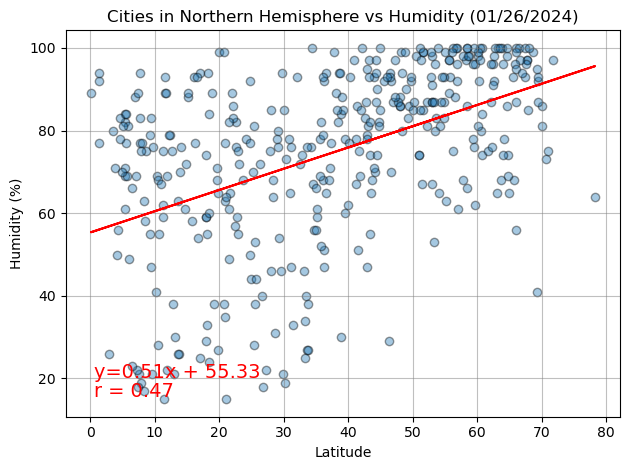

In [68]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]

plt.scatter(x_axis, y_axis, edgecolors="black", alpha=.40)
rvalue = lin_regress_calc(x_axis, y_axis)

# Incorporate the other graph properties
plt.grid(color="grey", alpha=.5)
plt.title(f"Cities in Northern Hemisphere vs Humidity ({formatted_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/North-Humid.png")

# Show plot
print(f"R-Value:  {rvalue}")
plt.show()

R-Value:  0.31266334542035273


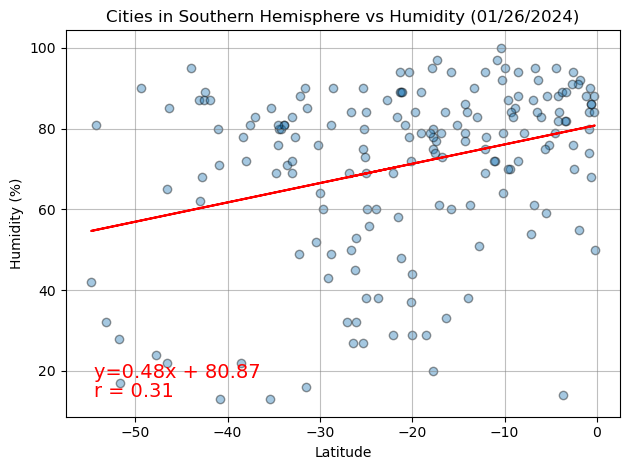

In [69]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]

plt.scatter(x_axis, y_axis, edgecolors="black", alpha=.40)
rvalue = lin_regress_calc(x_axis, y_axis)

# Incorporate the other graph properties
plt.grid(color="grey", alpha=.5)
plt.title(f"Cities in Southern Hemisphere vs Humidity ({formatted_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/South-Humid.png")

# Show plot
print(f"R-Value:  {rvalue}")
plt.show()

**Discussion about the linear relationship:** 

In the northern hemisphere, we can see a moderate positive correlation between humidity and latitude, with an r-value of 0.47.  This data suggests that as cities are further away from the equator, humidity tends to increase.  A similar, but weaker, positive correlation with an r-value of 0.31 was observed in the southern hemisphere.    It is unusual for both the northern and southern hemispheres show positive correlation, which is contrary to the expected inverse relationship between hemispheres.

This unexpected result raises question as to whether this pattern is coincidence as it is a snapshot in time (1/26/2024).  External factors, such as storms or other weather conditions, could be influencing these results.  Additional study over an extended period of time would be needed to determine if a consistent correlation exists. 



### Cloudiness vs. Latitude Linear Regression Plot

R-Value:  0.2793212175693356


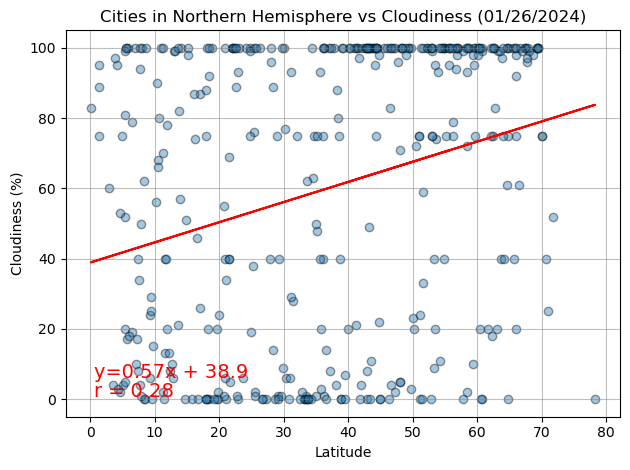

In [70]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]

plt.scatter(x_axis, y_axis, edgecolors="black", alpha=.40)
rvalue = lin_regress_calc(x_axis, y_axis)

# Incorporate the other graph properties
plt.grid(color="grey", alpha=.5)
plt.title(f"Cities in Northern Hemisphere vs Cloudiness ({formatted_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/North-Cloud.png")

# Show plot
print(f"R-Value:  {rvalue}")
plt.show()

R-Value:  0.24803406364044991


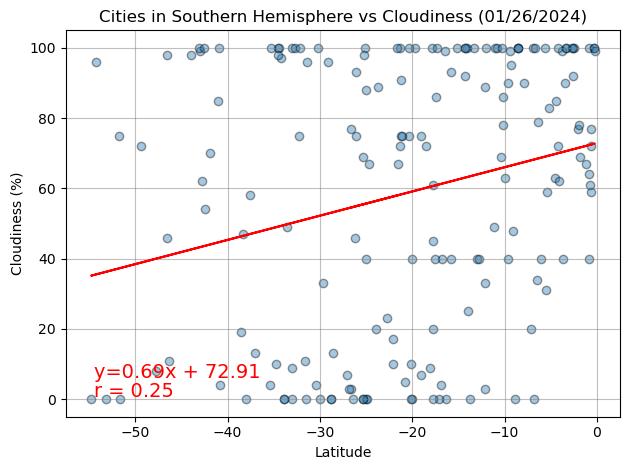

In [71]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]

plt.scatter(x_axis, y_axis, edgecolors="black", alpha=.40)
rvalue = lin_regress_calc(x_axis, y_axis)

# Incorporate the other graph properties
plt.grid(color="grey", alpha=.5)
plt.title(f"Cities in Southern Hemisphere vs Cloudiness ({formatted_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/South-Cloud.png")

# Show plot
print(f"R-Value:  {rvalue}")
plt.show()

**Discussion about the linear relationship:**

In both the northern and southern hemispheres, there is a noticeable but weak correlation between cloudiness and latitude. The northern hemisphere exhibits a weak positive correlation with an r-value of 0.28, while the southern hemisphere displays a similar weak positive correlation with an r-value of 0.25. Given the anticipation of an inverse relationship between the two hemispheres, the observed weak positive correlations, along with their modest r-values, suggest that a long-term correlation between cloudiness and latitude is unlikely.

### Wind Speed vs. Latitude Linear Regression Plot

R-Value:  -0.013127071473716058


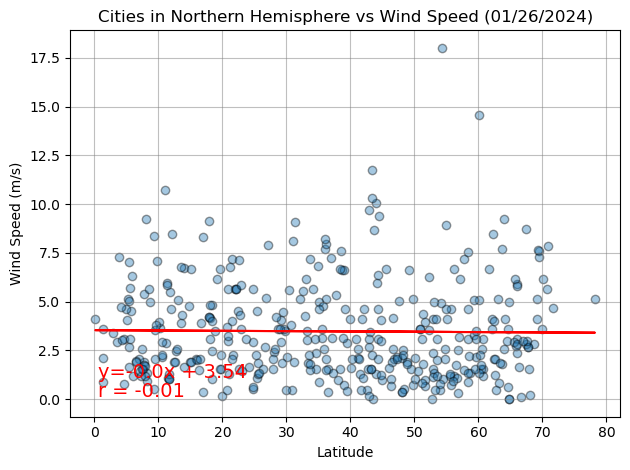

In [72]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]

plt.scatter(x_axis, y_axis, edgecolors="black", alpha=.40)
rvalue = lin_regress_calc(x_axis, y_axis)

# Incorporate the other graph properties
plt.grid(color="grey", alpha=.5)
plt.title(f"Cities in Northern Hemisphere vs Wind Speed ({formatted_date})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/North-Wind.png")

# Show plot
print(f"R-Value:  {rvalue}")
plt.show()

R-Value:  -0.3705138356991776


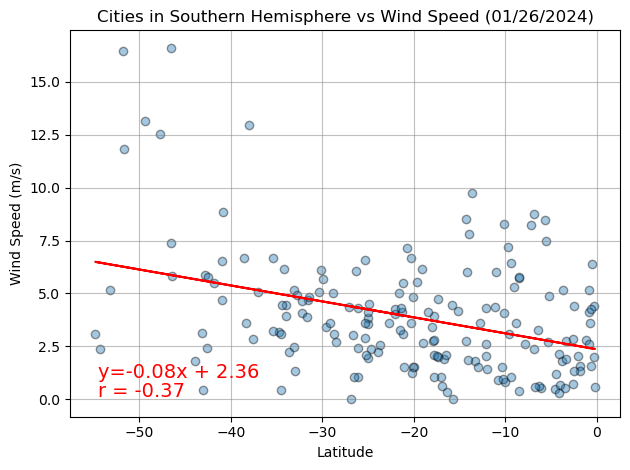

In [73]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]

plt.scatter(x_axis, y_axis, edgecolors="black", alpha=.40)
rvalue = lin_regress_calc(x_axis, y_axis)

# Incorporate the other graph properties
plt.grid(color="grey", alpha=.5)
plt.title(f"Cities in Southern Hemisphere vs Wind Speed ({formatted_date})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/South-Wind.png")

# Show plot
print(f"R-Value:  {rvalue}")
plt.show()

**Discussion about the linear relationship:** 

In the northern hemisphere, there appears to be a near-zero correlation between wind speed and latitude, indicated by an r-value of -0.01. However, the southern hemisphere exhibits a moderate negative correlation with a calculated r-value of -0.37.  The northern and southern hemispheres typically demonstrate an inverse relationship.  Given that the northern hemisphere shows a near zero correlation between wind speed and latitude, and the southern hemisphere has a moderate correlation, raises question as to whether this is coincidence.  The inconsistent results could be influenced by external factors such as localized storms or other weather anomalies in the southern hemisphere. Since this is a snapshot in time (1/26/2024), additional study over an extended period of time would be needed to determine if a consistent correlation exists.